In [306]:
import torch
import pandas as pd
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [307]:
training_data = datasets.FashionMNIST(
    root = "data" , 
    train = True,
    download= True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root = "data" , 
    train=False,
    download = True,
    transform= ToTensor()

)

In [308]:
next(iter(training_data))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

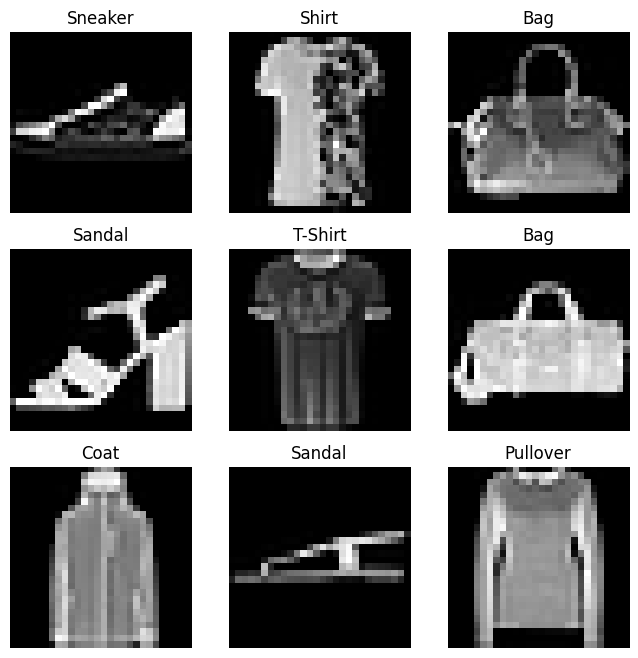

In [309]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [310]:
import os 
import pandas as pd 
from torchvision.io import read_image 
class CustomImageDataset(Dataset): 
    def __init__ (self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__ (self):
        return len(self.img_labels)
    def __getitem__ (self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0 ])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [311]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


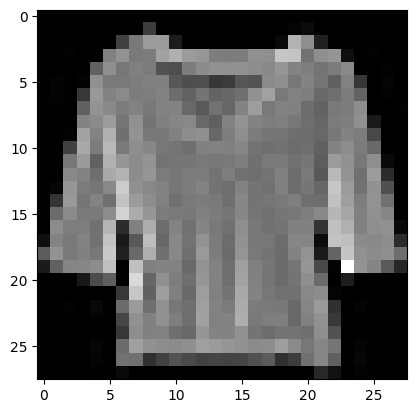

Label: 0


In [312]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [313]:
#ToTesnro conerts PIL Image or NumPy ndarray into a float Tensor
#Lambda function turns the interger into a one-hot encoded tensor

from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data" , 
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))

)
next(iter(ds))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [314]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype = torch.float).scatter_(dim = 0, index = torch.tensor(y) , value =1)
)
#Transforms our labels, we have 10 labels, scattering the index given by the label y 

A neural network is a modeule itself that consists of other modules, referred to as layers. This nested structure allows for building and managing architectures easily in PyTorch. PyTorch utilizes the torch.nn namepsace.

In [315]:
from torch import nn 
from torchvision import datasets, transforms
#Check if we can use GPU or MPS
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
) 
print(f"Using {device} device")
#It implements the same function as CPU tensors, but they utilize GPUs for computation.

Using cuda device


In [316]:
#Flattens a contiguous range of dims into a tensor.
class NeuralNetwork (nn.Module):
    def __init__(self) : 
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    def forward(self, x):
            x = self.flatten(x)
            logits = self.linear_relu_stack(x)
            return logits
#nn.Flatten() flattens the image tensor from a 3D shape (batch_size, height, width) 
#to a 2D Shape (batch_size, height*width)
#flatten is which allows to flatten the dimensions, as it flattens all dimensiosn excepth the batch dim (0th dim)


In [317]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [318]:
#Do not call model forward directly
#We pass the input data to excecute forward
X= torch.rand(1,28,28 , device= device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted Class: {y_pred}")
#SoftMax coverts logits to probabilities, summing over classes to 1

Predicted Class: tensor([8], device='cuda:0')


In [319]:
#Breakdown of what happens with a minibatch of 3 images, size 28*28
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [320]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
#Flattened the dim while keeping the batch size, initializing the flatten layer

torch.Size([3, 784])


In [321]:
#We will now work on the linear layer
layer1 = nn.Linear(in_features=28*28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())
hidden1
#Linear transformation on the input using the stored weights and biases

torch.Size([3, 20])


tensor([[ 0.0075, -0.2575,  0.2965,  0.0143, -0.4572,  0.0835,  0.1404,  0.2619,
          0.3278, -0.1131,  0.0014, -0.0566, -0.5270,  0.5623,  0.6280,  0.4157,
          0.3524,  0.0567,  0.0415,  0.1498],
        [-0.0351, -0.4016,  0.5759,  0.1131, -0.5986,  0.1360,  0.4346,  0.4368,
          0.2758, -0.0493,  0.2434, -0.1600, -0.4079, -0.0485,  0.4996,  0.1867,
          0.1355, -0.0450, -0.3072,  0.0340],
        [-0.1317, -0.4163,  0.6880,  0.0994, -0.2862,  0.1617,  0.1620,  0.1101,
         -0.0931,  0.0779,  0.1960, -0.1799, -0.3293,  0.1712,  0.8482,  0.4043,
          0.2336,  0.4055,  0.0205, -0.1763]], grad_fn=<AddmmBackward0>)

In [322]:
print(f"Before ReLU: {hidden1}\n\n")
relu = nn.ReLU()
hidden1 = relu(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0075, -0.2575,  0.2965,  0.0143, -0.4572,  0.0835,  0.1404,  0.2619,
          0.3278, -0.1131,  0.0014, -0.0566, -0.5270,  0.5623,  0.6280,  0.4157,
          0.3524,  0.0567,  0.0415,  0.1498],
        [-0.0351, -0.4016,  0.5759,  0.1131, -0.5986,  0.1360,  0.4346,  0.4368,
          0.2758, -0.0493,  0.2434, -0.1600, -0.4079, -0.0485,  0.4996,  0.1867,
          0.1355, -0.0450, -0.3072,  0.0340],
        [-0.1317, -0.4163,  0.6880,  0.0994, -0.2862,  0.1617,  0.1620,  0.1101,
         -0.0931,  0.0779,  0.1960, -0.1799, -0.3293,  0.1712,  0.8482,  0.4043,
          0.2336,  0.4055,  0.0205, -0.1763]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0075, 0.0000, 0.2965, 0.0143, 0.0000, 0.0835, 0.1404, 0.2619, 0.3278,
         0.0000, 0.0014, 0.0000, 0.0000, 0.5623, 0.6280, 0.4157, 0.3524, 0.0567,
         0.0415, 0.1498],
        [0.0000, 0.0000, 0.5759, 0.1131, 0.0000, 0.1360, 0.4346, 0.4368, 0.2758,
         0.0000, 0.2434, 0.0000, 0.0000, 0.0000, 0.49

In [323]:
#nn sequential is an ordered container of modules
#we define the order of the modules for the data to pass through
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
 )
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
#logits is the raw unnormalized scores a NN produces from its last linear layer
#before any activation funct is applied

In [324]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
#Converting classes to probabilities as said above
#Dim indicates the dim along which the values must sum to 1
print(f"Softmax value:  {pred_probab}")

Softmax value:  tensor([[0.0943, 0.1197, 0.0966, 0.1037, 0.0844, 0.1139, 0.0654, 0.1229, 0.0954,
         0.1036],
        [0.1024, 0.1209, 0.0929, 0.1063, 0.0742, 0.1091, 0.0730, 0.1252, 0.0945,
         0.1013],
        [0.0965, 0.1295, 0.0914, 0.1086, 0.0748, 0.1248, 0.0668, 0.1171, 0.0925,
         0.0980]], grad_fn=<SoftmaxBackward0>)


In [325]:
#Layers can be parametrized, i.e. has biases and weights
#Subclassing nn.Module tracks and makes parameteres accessible

print(f"Model structure: {model} \n\n")

for name, param in model.named_parameters():
    print(f"Layer {name} | Size: {param.size()} | Values: {param[:2]} \n")
print(f"Size | Preview of values \n" )

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0078,  0.0321,  0.0265,  ...,  0.0045, -0.0205, -0.0034],
        [ 0.0169,  0.0074,  0.0346,  ..., -0.0261,  0.0263,  0.0210]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0354, -0.0200], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0050, -0.0040,  0.0253,  ...,  0.0110,  0.0402, -0.0282],
        [ 0.0022, -0.0228,  0.0306,  ..., -0.0143, -0.0078, -0.0069]],
       device='cuda:0', grad_fn=<SliceBa

**Quick rundown here on understanding tensor shapes, a tensor with shape (3,4,5) has 3 slices or blocks, each block having 4 rows, and each row has 5 columns**
\
\
\
**So in our example we have a tensor with a shape of (10 , 512) meaning we have  atensor with 10 blocks, each block having 512 rows**

---

**Now we'll look at the math and how back propagation works**

In [326]:
#Simple one-layer network

x = torch.ones(5) #input tensor
y = torch.zeros(3) #expected output
w = torch.randn(5,3, requires_grad=True)
b= torch.randn(3, requires_grad=True)
z=torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
#w,b are parameters to optimize, to do this we will need to be able to computer the gradients of loss function
#with respect to w,b

<div style="background-color: #f5f2f1; padding: 10px; border-radius: 5px;">

    ![alt text](comp-graph.png "This is the computational graph")

</div>

I'll come back to make this work eventually with HTML

In [327]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")
#Grad_Fn is the stored reference to the backwards propagation function

Gradient function for z = <AddBackward0 object at 0x0000020C31073940>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000020C31082DA0>


In [328]:
loss.backward()
print(w.grad)
print(b.grad)
#Computing the derivatives of our loss function with respect to the parameters

tensor([[0.0740, 0.1286, 0.2901],
        [0.0740, 0.1286, 0.2901],
        [0.0740, 0.1286, 0.2901],
        [0.0740, 0.1286, 0.2901],
        [0.0740, 0.1286, 0.2901]])
tensor([0.0740, 0.1286, 0.2901])


In [329]:
#To disable gradient tracking, i.e. when the model is trained and we just want to input some data
#We can stop tracking computations by using detach on the tensor
z = torch.matmul(x,w ) + b
z_det = z.detach()
print(z_det.requires_grad)

False


Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. 
Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), 
#and optimizes these parameters using gradient descent.

---
**Number of Epochs** : Number of times we iterate over the dataset 


**Batch size** : Number of data samples propagates through the network before our parameters are updated


**Learning rate** : How much to update our models parameters after each epoch. Largue values may result in unpredictable behavior during training


In [330]:
learning_rate = 1e-3
batch_size = 64
epoch = 5

In [331]:
#Initialize our loss function
loss_fin = nn.CrossEntropyLoss()
#Remember loss function measures the degree of dissimilarity of the result to the target value

In [332]:
#Here we work on optimizing our processes, by registering the param to be trained and the learning rate
optimizer = torch.optim.SGD(model.parameters() , lr = learning_rate)
#This will zero each gradient at iteration, backpropogate the prediction loss, and adjust the param collected in a backwards pass

In [333]:
def train_loop(dataloader, model, loss_fn, optimizer):
    #Set the model to train mode
    #Unecessary but it's a good practice
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Move data and labels to the device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

def test_loop(dataloader, model, loss_fn):
    #Set the model to eval mode
    #Unecessary but added for practices
    model.eval()
    test_loss, correct = 0, 0
    #Evaluating with no grad ensures no gradients are computed
    #Import in test mode
    with torch.no_grad():
        for X, y in dataloader:
            # Move data and labels to the device
            X, y = X.to(device), y.to(device)

            # Compute prediction and loss
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= len(dataloader.dataset)
    correct /= len(dataloader.dataset)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [334]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.317947  [    0/60000]
loss: 2.294726  [ 6400/60000]
loss: 2.274403  [12800/60000]
loss: 2.246629  [19200/60000]
loss: 2.254611  [25600/60000]
loss: 2.231626  [32000/60000]
loss: 2.215369  [38400/60000]
loss: 2.190771  [44800/60000]
loss: 2.171211  [51200/60000]
loss: 2.161926  [57600/60000]
Test Error: 
 Accuracy: 47.4%, Avg loss: 0.033755 

Epoch 2
-------------------------------
loss: 2.164245  [    0/60000]
loss: 2.133226  [ 6400/60000]
loss: 2.085636  [12800/60000]
loss: 2.066140  [19200/60000]
loss: 2.065338  [25600/60000]
loss: 2.010467  [32000/60000]
loss: 1.986340  [38400/60000]
loss: 1.958118  [44800/60000]
loss: 1.929355  [51200/60000]
loss: 1.881523  [57600/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 0.029371 

Epoch 3
-------------------------------
loss: 1.853181  [    0/60000]
loss: 1.822091  [ 6400/60000]
loss: 1.805695  [12800/60000]
loss: 1.674962  [19200/60000]
loss: 1.675149  [25600/60000]
loss: 1.657928  [32000/600

In [335]:
#PyTorch models store the learned parameters in state_dict
#These can persist with torch.save
import torchvision.models as models
model = models.vgg16(weights = 'IMAGENET1K_V1')
torch.save(model.state_dict() , 'model_weights.pth')


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\adenm/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


In [339]:
#To load this models weights
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()
#Do this right after loading the model weights


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1